## Smooting techniques

### Averaging


In [5]:
import yfinance as yf  
import pandas as pd

data = yf.download('AAPL','2019-01-01','2020-01-01', progress=False) # Get the data of the stock AAPL
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.177803,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.221367,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.414234,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.883350,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.803486,219111200
...,...,...,...,...,...,...
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.835594,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,71.221153,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,71.194130,146266000


Let's create a new column that contains the average level of the variable ```open``` and plot it in these two columns in the same graph, as well as calculate the MSE between both columns.

The MSE for this global average smoothing is : 73.86167672394183


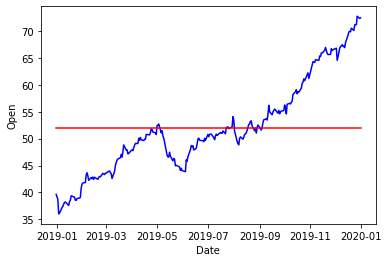

In [7]:
import seaborn as sns
import numpy as np
data["open_mean"] = data["Open"].mean()

sns.lineplot(x=data.index, y=data["Open"], color="blue")
sns.lineplot(x=data.index, y=data["open_mean"], color="red")

MSE = np.mean((data["Open"]-data["open_mean"])**2)
print("The MSE for this global average smoothing is : {}".format(MSE))

### Single moving average

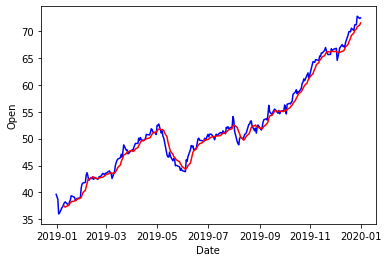

In [8]:
y = data["Open"]
MA7 = y.rolling(window=7)
data["Open_MA_7"] = MA7.mean()

sns.lineplot(x=data.index, y=data["Open"], color="blue")
sns.lineplot(x=data.index, y=data["Open_MA_7"], color="red");


### Exponential Smoothing
#### Single exponential smoothing

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:ylabel='Open'>

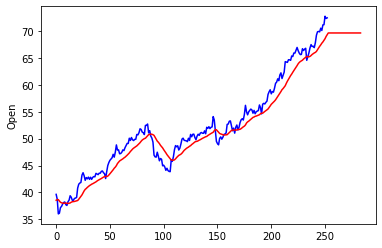

In [13]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from datetime import datetime, timedelta

SES = SimpleExpSmoothing(data["Open"])
SES_fit = SES.fit(0.1)
SES_predict = SES_fit.predict(start=0, end = len(data)+30)
sns.lineplot(x=range(len(data)), y=data["Open"], color="blue")
sns.lineplot(x=SES_predict.index, y=SES_predict, color="red")


#### Double exponential smoothing

C:\Users\admis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\admis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


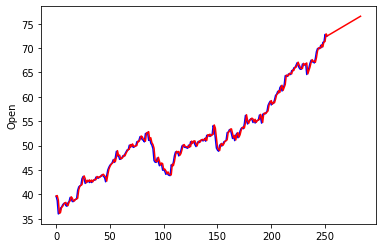

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
DES = ExponentialSmoothing(data["Open"], trend = 'add')
DES_fit = DES.fit()
DES_predict = DES_fit.predict(start=0, end = len(data)+30)

sns.lineplot(x=range(len(data)), y=data["Open"], color="blue")
sns.lineplot(x=DES_predict.index, y=DES_predict, color="red")


#### Triple exponential smoothing 

C:\Users\admis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\admis\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\admis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


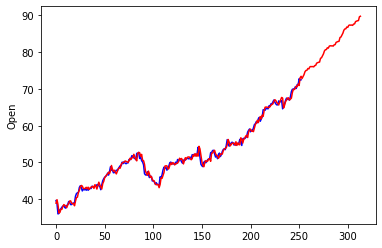

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
TES = ExponentialSmoothing(y, trend = 'add', seasonal = 'add', seasonal_periods = 20)
TES_fit = TES.fit()
TES_predict = TES_fit.predict(start=0, end = len(data)+60)


sns.lineplot(x=range(len(data)), y=data["Open"], color="blue")
sns.lineplot(x=TES_predict.index, y=TES_predict, color="red")

A slight lag is still present, but this time our forecasts have the advantage of presenting a trend and a seasonality that makes it able to infer believable predictions for the first few dates. After a while however, we notice that the predictions seem to have a very repetitive behavior and this means that the Holt Winters model is not a good candidate for long term predictions over time series (by long term understand further into the future than one seasonality period).


## Univariate time series modeling 
### Stationarity

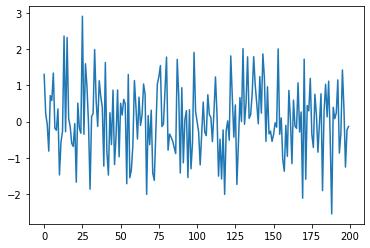

In [14]:
sample = np.random.randn(200)
sns.lineplot(x=range(200),y=sample);

#### Autocorrelation

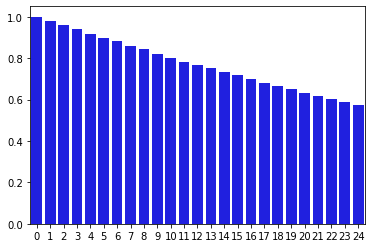

In [15]:
import statsmodels.api as sm
Open = data["Open"]

autocor = pd.Series(sm.tsa.stattools.acf(Open))

sns.barplot(x = autocor.index, y = autocor, color = "blue");


The autocorrelation graph does not indicate stationarity because we have not removed the trend from the data. We could do this by differentiating the series once.

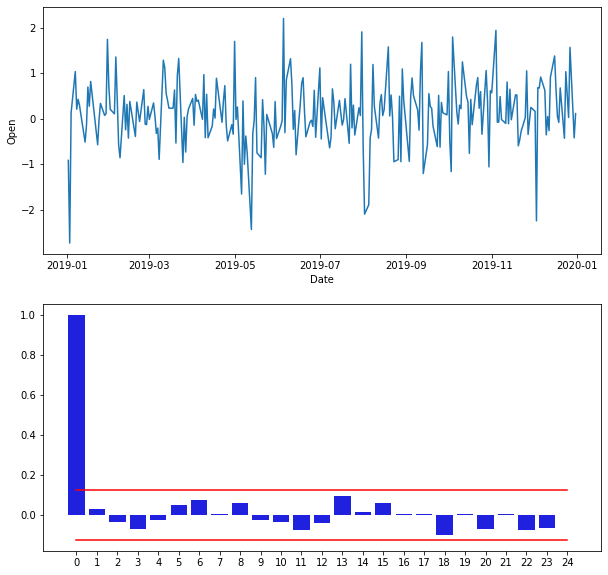

In [16]:
Open_diff = Open.diff()[1:]
autocor = pd.Series(sm.tsa.stattools.acf(Open_diff))

import matplotlib.pyplot as plt 

fig, ax = plt.subplots(2,1, figsize = (10,10))
sns.lineplot(x= Open_diff.index, y= Open_diff, ax = ax[0])

sns.barplot(x = autocor.index, y = autocor, color = "blue", ax = ax[1])
sns.lineplot(x = autocor.index, y = 1.96/np.sqrt(len(Open_diff)), color ="red", ax = ax[1])
sns.lineplot(x = autocor.index, y = -1.96/np.sqrt(len(Open_diff)), color ="red", ax = ax[1]);

Here, no autocorrelation level is significant at 95% (the significance level is indicated byt the red lines) So the data might be randomly distributed.

#### Partial autocorrelations

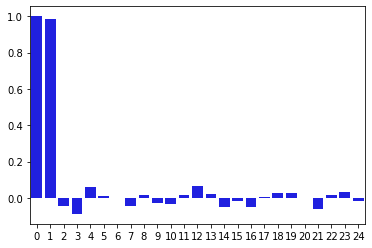

In [17]:
'''autocorrelation'''
import statsmodels.api as sm
Open = data["Open"]

pautocor = pd.Series(sm.tsa.stattools.pacf(Open))

sns.barplot(x = pautocor.index, y = pautocor, color = "blue");

This is the partial autocorrelation graph for the undifferentiated data, however it is not stationnary so let's plot the partial autocorrelation graph for the differentiated series :

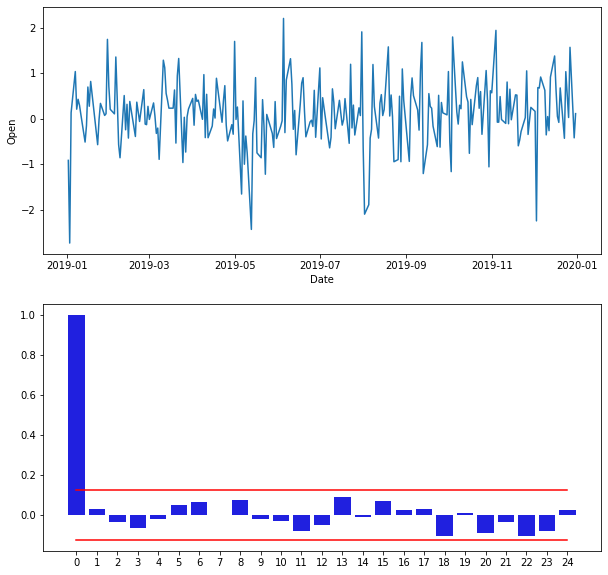

In [18]:
Open_diff = Open.diff()[1:]
pautocor = pd.Series(sm.tsa.stattools.pacf(Open_diff))

import matplotlib.pyplot as plt 

fig, ax = plt.subplots(2,1, figsize = (10,10))
sns.lineplot(x= Open_diff.index, y= Open_diff, ax = ax[0])

sns.barplot(x = pautocor.index, y = pautocor, color = "blue", ax = ax[1])
sns.lineplot(x = pautocor.index, y = 1.96/np.sqrt(len(Open_diff)), color ="red", ax = ax[1])
sns.lineplot(x = pautocor.index, y = -1.96/np.sqrt(len(Open_diff)), color ="red", ax = ax[1]);

The conclusion here is that data appears to be randomly distributed over time, which is not entirely surprising for stocks.